# Линейно разделимый случай.

Задача классификации двух образов, представленных характеристиками x1, x2.

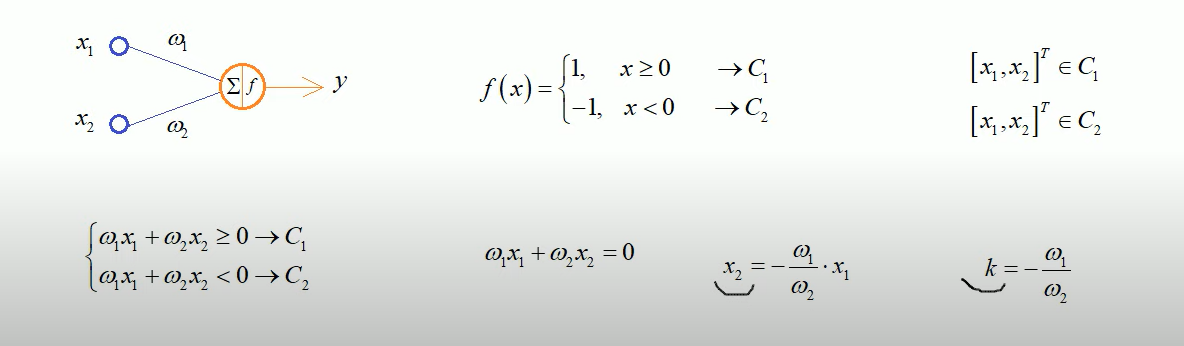

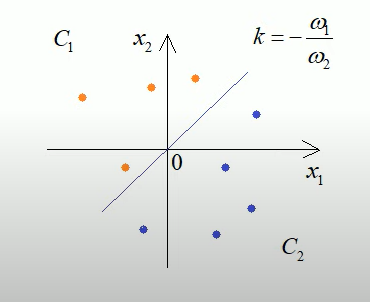

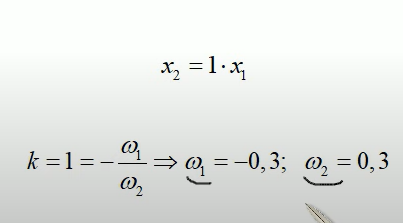

Веса подобрали вручную. Исходя из того, что у взяли простейший случай с прямой под 45 градусов.

C1 = [array([0.06546398, 0.94079618, 0.14799368, 0.21729353, 0.38258894]), array([0.86546398, 1.24079618, 0.54799368, 0.91729353, 1.08258894])]
C2 = [array([0.67422221, 0.38739277, 0.3190538 , 0.02320657, 0.87546933]), array([ 0.27422221, -0.31260723, -0.4809462 , -0.97679343,  0.57546933])]
x = [0.67422221 0.27422221]
y = -0.12
Класс C2
x = [ 0.38739277 -0.31260723]
y = -0.20999999999999996
Класс C2
x = [ 0.3190538 -0.4809462]
y = -0.23999999999999996
Класс C2
x = [ 0.02320657 -0.97679343]
y = -0.3
Класс C2
x = [0.87546933 0.57546933]
y = -0.08999999999999994
Класс C2


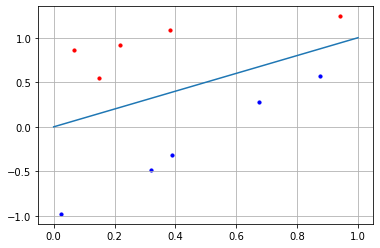

In [33]:
import numpy as np
import matplotlib.pyplot as plt

N = 5

x1 = np.random.random(N)
# print(x1)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)]
# print(x2)
C1 = [x1, x2]
print('C1 =', C1)

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1 # доп.0.1, чтобы точка x2 была точно ниже прямой
C2 = [x1, x2]
print('C2 =', C2)

f = [0, 1]

w = np.array([-0.3, 0.3])
for i in range(N):
    x = np.array([C2[0][i], C2[1][i]])
    print(f'x = {x}')
    y = np.dot(w, x)
    print(f'y = {y}')
    if y >= 0:
        print("Класс C1")
    else:
        print("Класс C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

In [35]:
0.67422221 * 0.3 + (0.27422221) * (-0.3)

0.12000000000000001

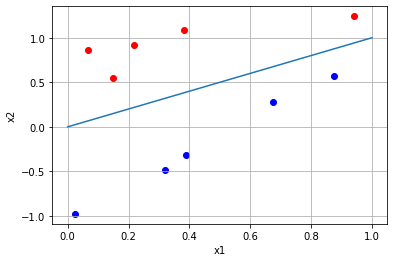

In [34]:
plt.scatter(C1[0], C1[1], c='red')
plt.scatter(C2[0], C2[1], c='blue')
plt.plot(f)
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [10]:
[np.random.randint(10)/10 for i in range(N)]

[0.1, 0.0, 0.1, 0.8, 0.8]

In [11]:
lst = []
for i in range(N):
  lst.append(np.random.randint(10)/10)
lst

[0.1, 0.8, 0.6, 0.4, 0.2]

Линейно разделимый случай со смещением относительно нуля. x2 смещено относительно 0 на порог b (bias). Для этого вводят новый вход для смещения определяющей гиперплоскости со значением 1.

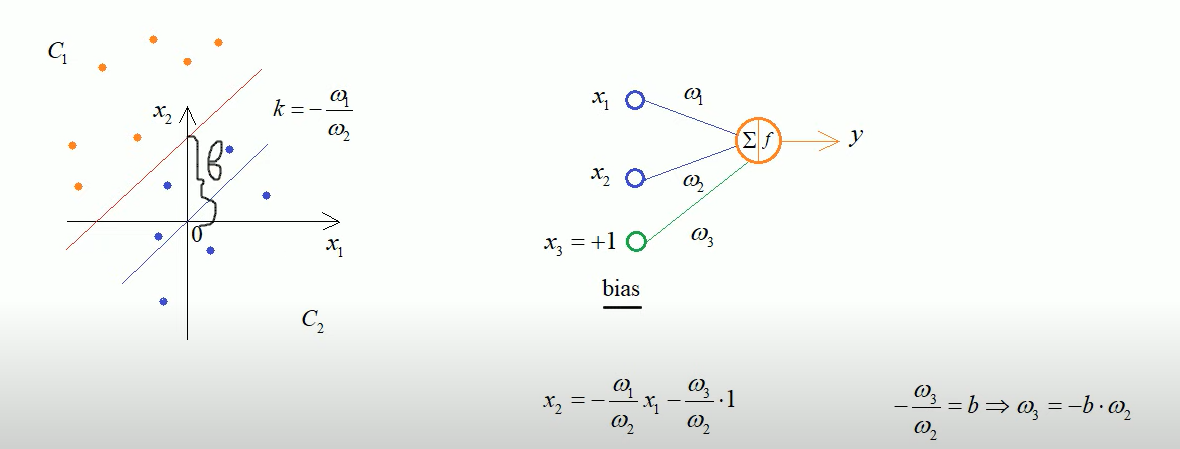

Класс C1
Класс C1
Класс C1
Класс C1
Класс C1


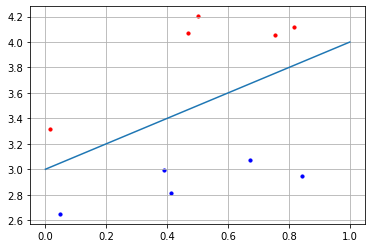

In [43]:
N = 5
b = 3

x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)] + b
C1 = [x1, x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1 + b
C2 = [x1, x2]

f = [0 + b, 1 + b]
# print(f)

w1 = -0.5
w2 = - w1
w3 = -b * w2
w = np.array([w1, w2, w3])
for i in range(N):
    x = np.array([C1[0][i], C1[1][i], 1])
    y = np.dot(w, x)
    if y >= 0:
        print("Класс C1")
    else:
        print("Класс C2")

plt.scatter(C1[0][:], C1[1][:], s=10, c='red')
plt.scatter(C2[0][:], C2[1][:], s=10, c='blue')
plt.plot(f)
plt.grid(True)
plt.show()

# Задача XOR

Рассмотрим такую задачу, где классы распределены по углам. Разделить классы линией невозможно.

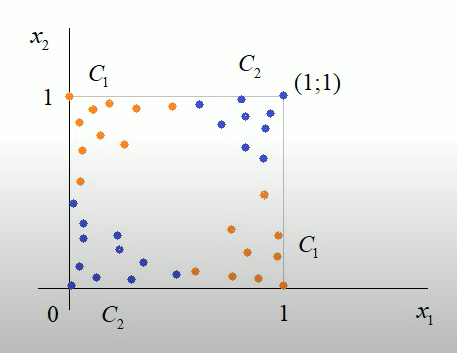

Но можно разделить классы двумя линиями.

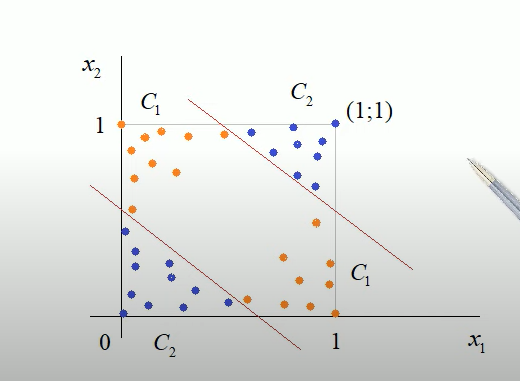

При этом каждая разделительная линия может быть представлена отдельным нейроном. А затем результат их классификации объединяется результирующим выходным нейроном.

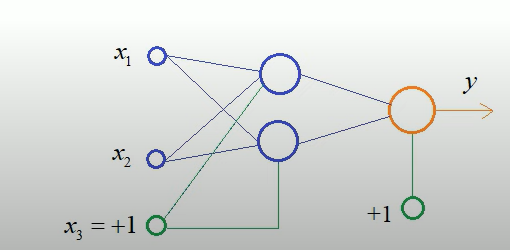

Пусть для простоты на вход будем подавать сигналы либо ноль, либо 1. Также пусть класс C2 будет 0, а C1 будет 1. Тогда 

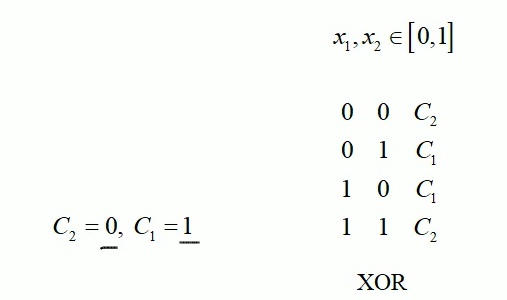

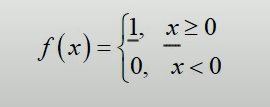

Первый нейрон будет формировать у нас верхнюю границу. Пусть она будет такой. +1.5 - берём просто допуская такое число. Наклон отрицательный под 45 градусов, поэтому -1.

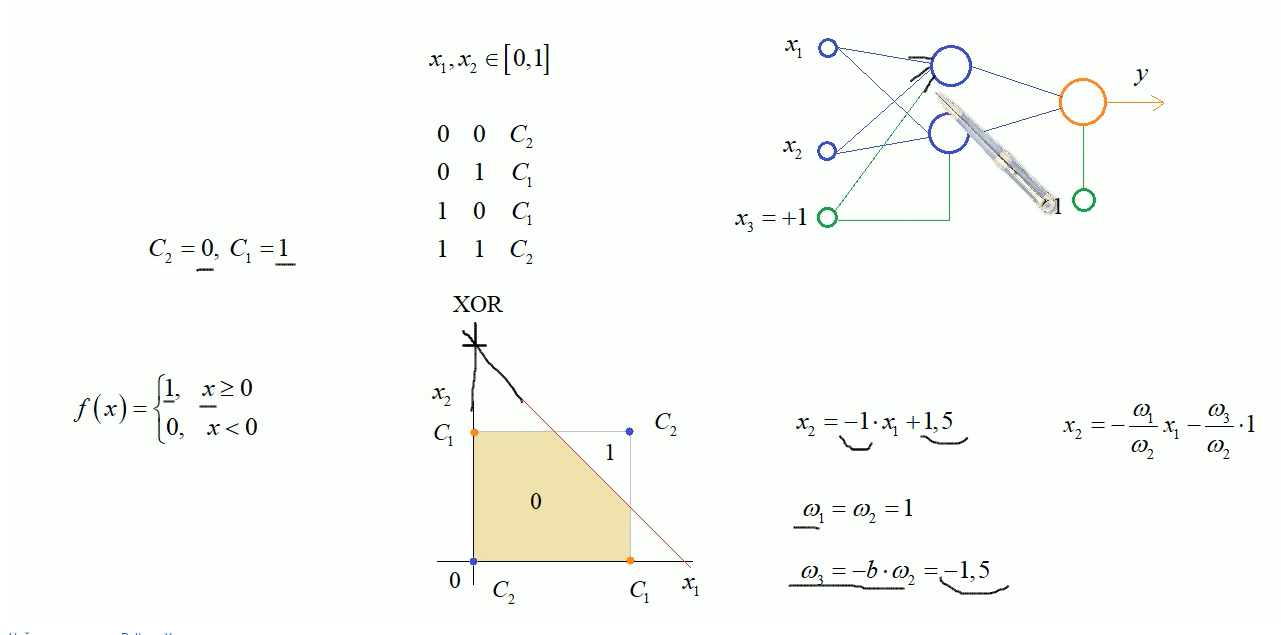

Второй нейрон будет формировать вторую границу. Точка пересечения с осью x2 = 0.5. Выбрали так. Наклон = -1

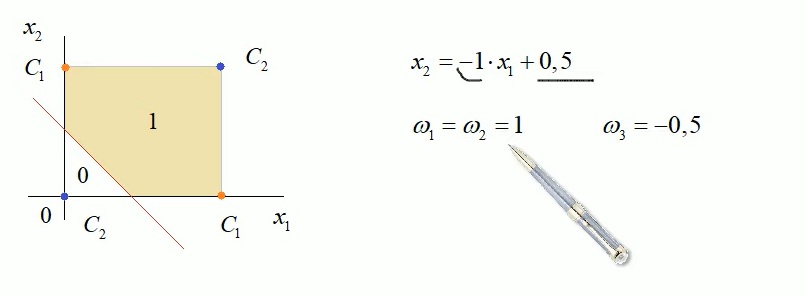

Теперь нужно объединить работу этих двух нейронов для формирования полосы. Если просто сложить, то получим неверную вещь. Для отдельного нейрона: если x (уже после векторного умножения), то функция активации даёт нам 1. Поэтому в верхнем угле будет 1 для первого нейрона, но и для второго будет 1. Получаем в обобщающей сумме по результатам двух нейронов 2. Чуть ниже для двух нейронов будет 1, а ещё ниже 0. Итого, если функция активации выходного нейрона такая же, то получим область как на картинке, но это нас не устраивает.

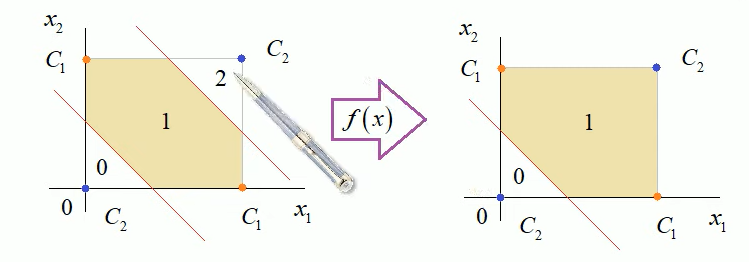

Следует не складывать, а вычесть.

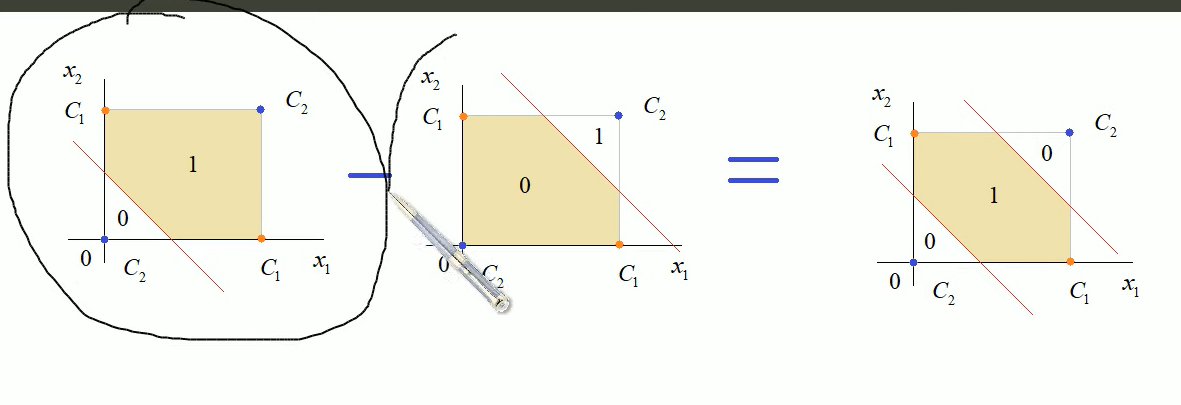

Ещё всё сместим на 0,5. для надёжности. У нас функция активации срабатывает в нуле. 

selfedu: "Мы смещаем границу, чтобы расстояния от классов образов было наибольшим. Это увеличивает обобщающие сопосбности сети и уменьшает число ошибок при эксплуатации."

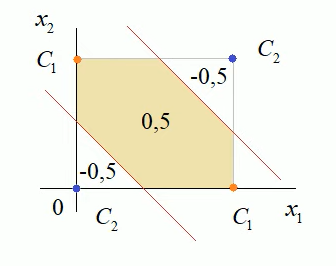

Итоговые веса:

Для выходного слоя -1 - это собственно вычитание. Нижняя 1 - это берём результат второго нейрона без изменений. (далее собсвенно вычитаем.)

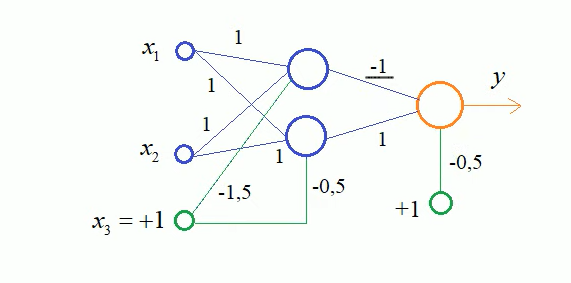

In [85]:
def act(x):
    return 0 if x <= 0 else 1

def go(C):
    x = np.array([C[0], C[1], 1])
    print('x = ', x, '\n')
    w1 = [1, 1, -1.5]
    w2 = [1, 1, -0.5]
    w_hidden = np.array([w1, w2])
    print('w_hidden = ', w_hidden, '\n')
    w_out = np.array([-1, 1, -0.5])
    # w_out = np.array([-1, 1])
    # w_out = np.array([-1, 1, 1])

    sum = np.dot(w_hidden, x)
    print('sum', sum)
    out = [act(x) for x in sum]
    # print('out = ', out)
    out.append(1)
    out = np.array(out)
    print('out = ', out)

    sum2 = np.dot(w_out, out)
    print('sum2 = ', sum2)
    y = act(sum2)
    return y

C1 = [(1,0), (0,1)]
C2 = [(0,0), (1,1)]

print('C2[0]', C2[0])
print( go(C2[0]))
# print( go(C1[0]), go(C1[1]) )
# print( go(C2[0]), go(C2[1]) )

C2[1] (1, 1)
x =  [0 0 1] 

w_hidden =  [[ 1.   1.  -1.5]
 [ 1.   1.  -0.5]] 

sum [-1.5 -0.5]
out =  [0 0 1]
sum2 =  -0.5
0
